# **Project Name**    -



##### **Project Type**    - Supervised Classification
##### **Contribution**    - Individual
##### **Name -**          - Sambit Pani


# **Project Summary -**

The project is related to the passenger experience and satisfaction on the airlines services offered. FInally we will come up with whether the passengers are going to recommend the airline to their friends and family menmbers or not.

# **GitHub Link -**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

# **Loading Libraries and the data undestanding**

---



In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import time

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone project Supervised/data_airline_reviews.xlsx')

In [ ]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Feature description
* airline: Name of the airline.
*overall: Overall point is given to the trip between 1 to 10.
*author: Author of the trip
*review date: Date of the Review
*customer review: Review of the customers in free text format
*aircraft: Type of the aircraft
*traveller type: Type of traveler (e.g. business, leisure)
*cabin: Cabin at the flight
*date flown: Flight date
*route: Route of the flight
*seat comfort: Rated between 1-5
*cabin service: Rated between 1-5
*foodbev: Rated between 1-5
*entertainment: Rated between 1-5
*groundservice: Rated between 1-5
*value for money: Rated between 1-5
*recommended: Binary, target variable



In [ ]:
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

###Null values handling

In [ ]:
df[pd.isnull(df['airline'])]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that all rows having nan values. Least nan values are in airline column. SO we will remove rows having nan values in airline column.

In [ ]:
df_new = df[~pd.isnull(df['airline'])]

In [ ]:
df_new.isnull().sum()

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

###Duplicate values

In [ ]:
df_new.duplicated().sum()

4764

In [ ]:
df_new.drop_duplicates(inplace=True)

In [ ]:
df_new.reset_index(inplace=True)

In [ ]:
df_new.drop(columns = ['index'],axis = 1,inplace = True)

In [ ]:
df_new.describe(include= 'all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,61183,59401.000000,61183,61183,61183,18488,37540,58705,37513,37434,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000,59761
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,I flew from Chicago O'Hare to Dublin and from ...,A320,Solo Leisure,Economy Class,BKK to LHR,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2871,NaN,93,198,2,2130,13935,45171,31,1127,NaN,NaN,NaN,NaN,NaN,NaN,31268
mean,NaN,5.164863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849,NaN
std,NaN,3.483701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


#**EDA**

In [ ]:
df_new.describe().columns.tolist()

['overall',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money']

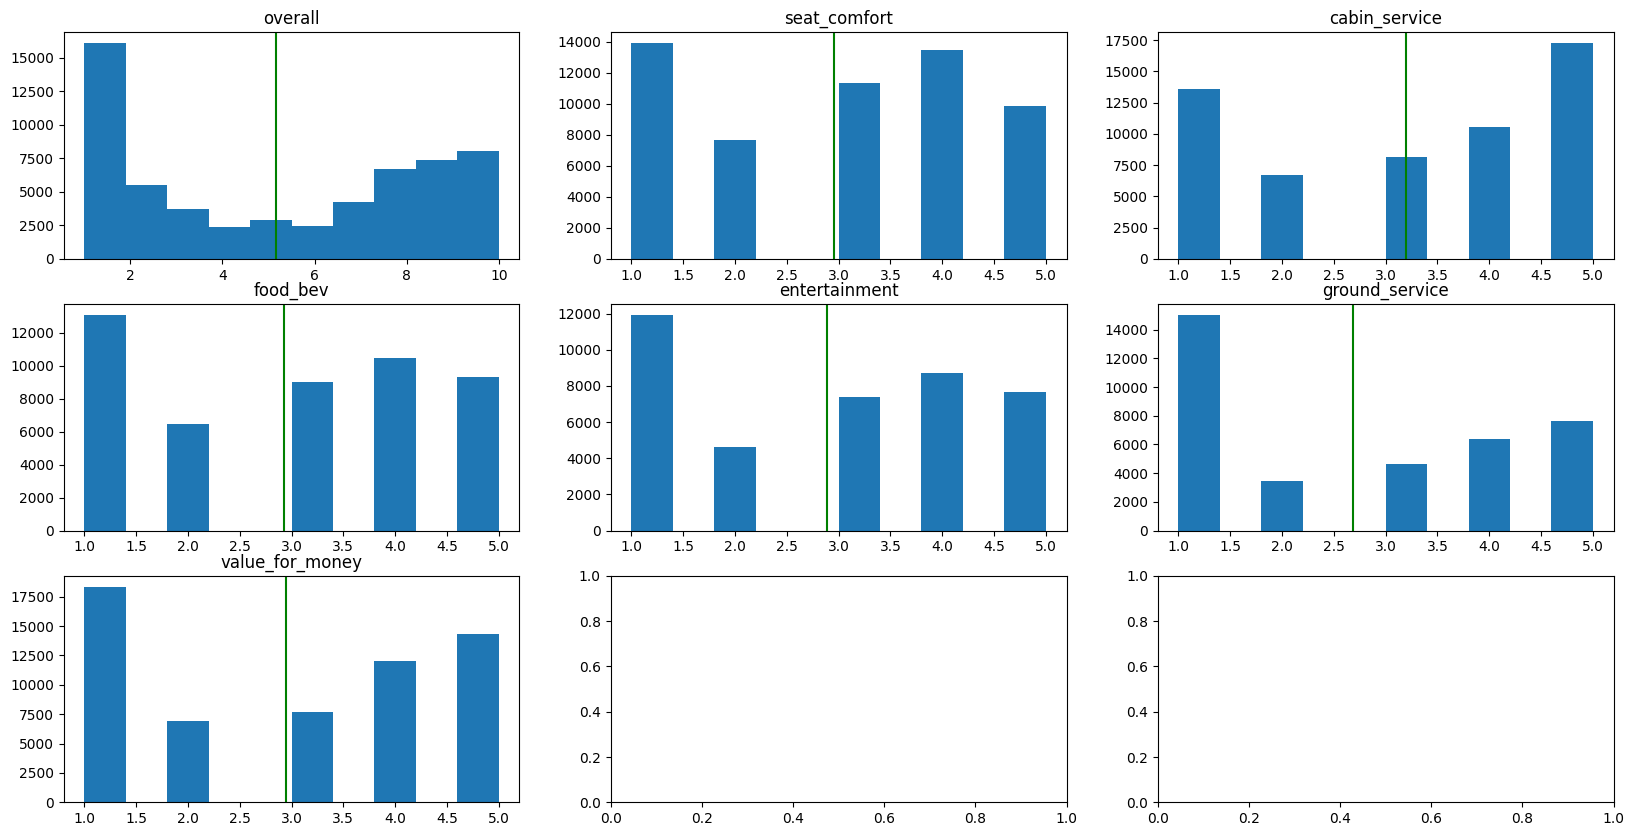

<Figure size 1500x1500 with 0 Axes>

In [ ]:
i = 0
j = 0
fig,axs = plt.subplots(3,3,figsize = (20,10))
plt.figure(figsize=(15,15))
for col in df_new.describe().columns.tolist() :

  axs[i,j].hist(df_new[col])
  axs[i,j].axvline(df_new[col].mean(),color = 'g')
  axs[i,j].set_title(col)
  j = j + 1
  if j == 3:
    i = i + 1
    j = 0

These are the ratings given by customers.

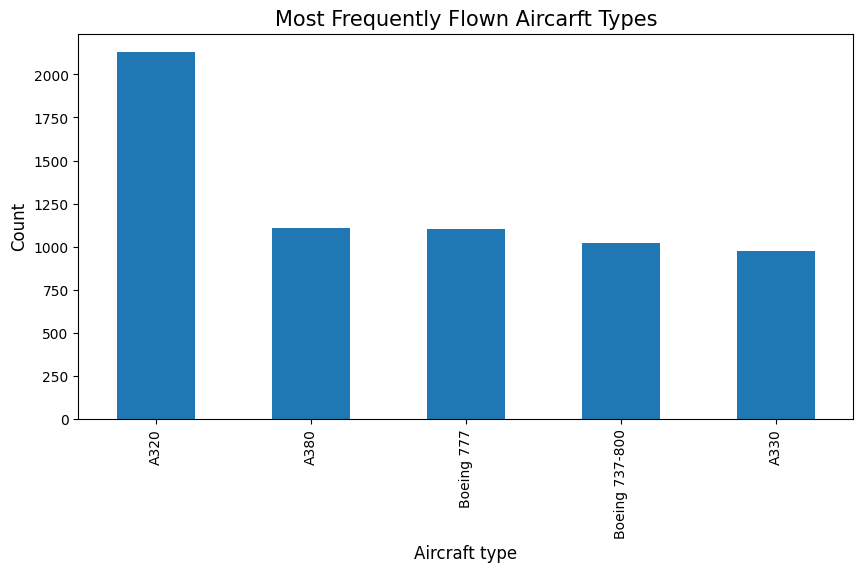

In [ ]:
plt.figure(figsize=(10,5))
df_new['aircraft'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Aircraft type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Frequently Flown Aircarft Types',fontsize=15)
plt.show()

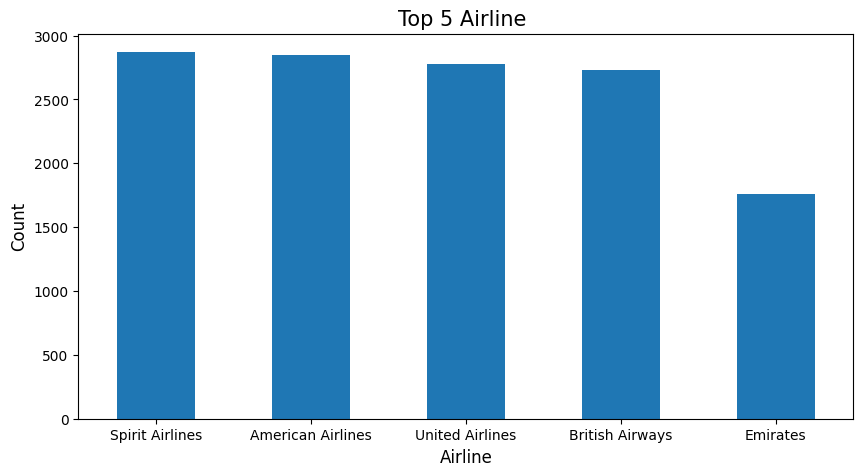

In [ ]:
plt.figure(figsize=(10,5))
df_new['airline'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
from datetime import datetime

In [ ]:
df_new['date_flown'] = df_new['date_flown'].apply(lambda x:pd.to_datetime(x))

In [ ]:
df_new['month_flown'] = df_new['date_flown'].dt.month

In [ ]:
df_month = df_new['month_flown'].value_counts().reset_index().sort_values(by='index')

In [ ]:
df_month.replace({1:'Jan',2:"Feb",3:"Mar",4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)


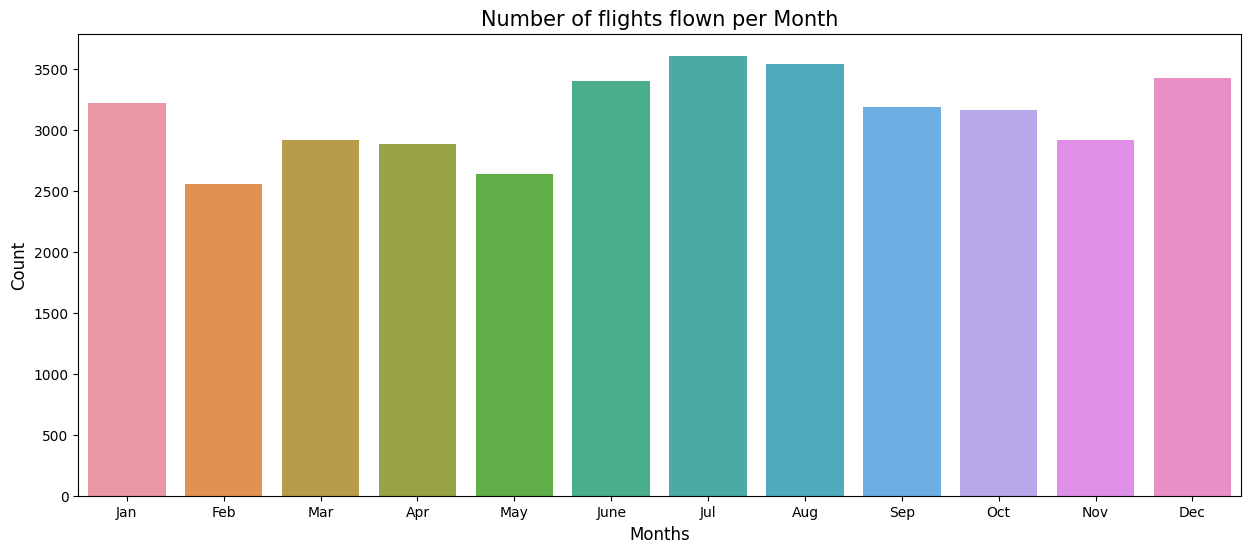

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='index',y='month_flown', data= df_month)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Number of flights flown per Month',fontsize=15)
plt.show()

* Travelling is more in june, july and august as there is summer vacation.
* Also January and December passengers are more due to winter vacation.

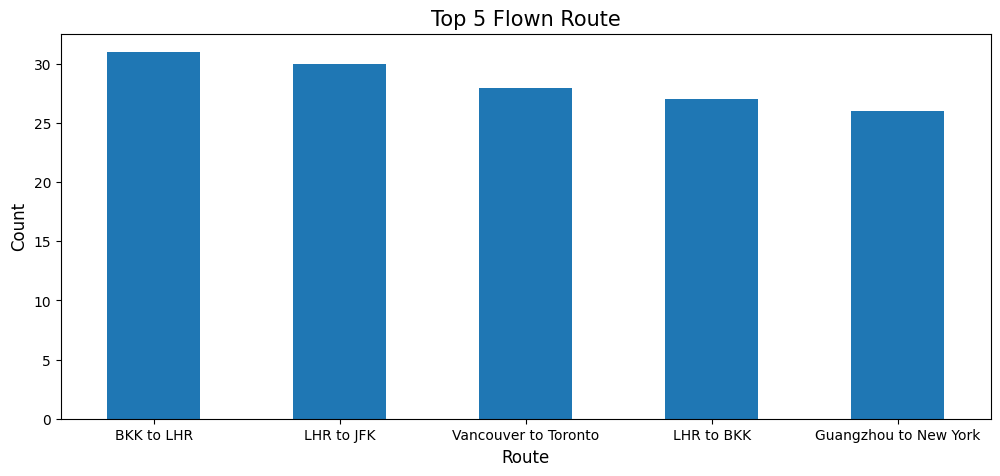

In [ ]:
plt.figure(figsize=(12,5))
df_new['route'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Route',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Flown Route',fontsize=15)
plt.xticks(rotation= 'horizontal')
plt.show()

<Axes: title={'center': 'Cabin type'}>

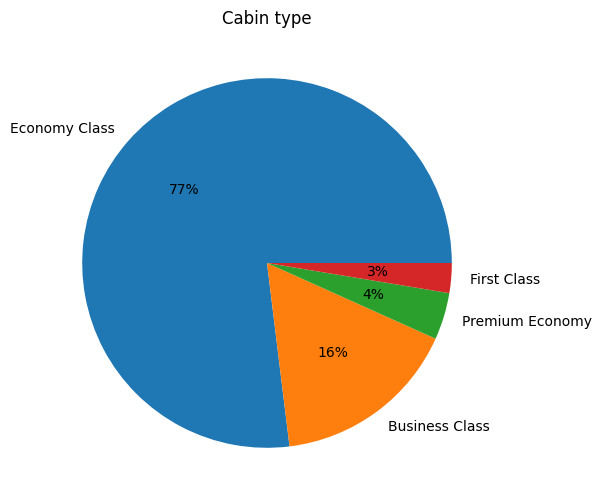

In [ ]:
df_new['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),title = 'Cabin type',ylabel = '')

due to low fare passengers prefer Economic Class.

<Axes: title={'center': 'Overall Rating'}>

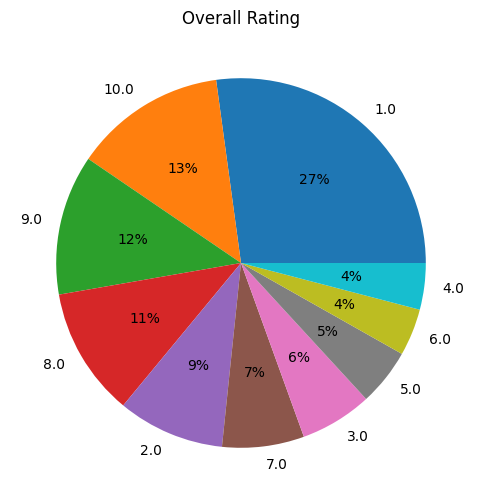

In [ ]:
df['overall'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),ylabel = '',title = 'Overall Rating')

So 43% customers have overall rating more than 7 out of 10. So most customers are satisfied with services.

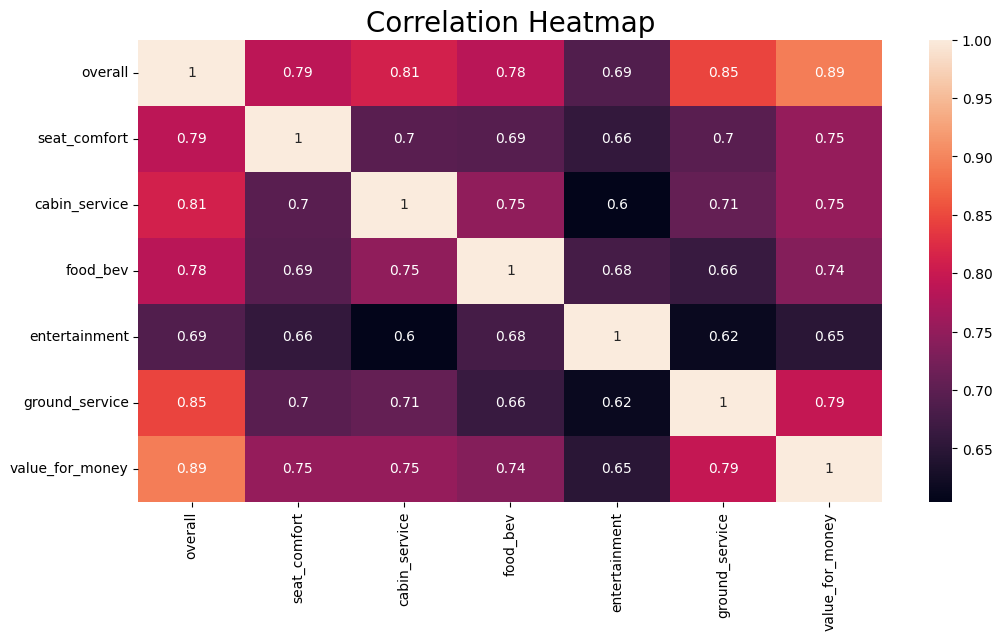

In [ ]:
df_corr = df_new.drop(columns = ['month_flown'],axis = 1).corr()
plt.figure(figsize=(12,6))
ax = plt.axes()
sns.heatmap(df_corr,annot = True,ax=ax)
ax.set_title('Correlation Heatmap',fontsize = 20)
plt.show()

Here overall and value for money has more collinearity.

#### VIF analysis

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculating vif
def cal_vif(x) :
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return(vif)

In [ ]:
df_vif = df_new.dropna(how = 'any')
cal_vif(df_vif[[i for i in df_vif.describe().columns if i in ['overall','seat_comfort','cabin_service','food_bev','entertainment',
                                                                  'ground_service','value_for_money']]])

,variables,VIF
0,overall,32.935217
1,seat_comfort,19.233666
2,cabin_service,21.181802
3,food_bev,19.144111
4,entertainment,12.903545
5,ground_service,14.755279
6,value_for_money,28.674325


We can remove value for money as overall is better than it.

In [ ]:
df_vif_2 = df_vif.drop(columns = ['value_for_money'])
cal_vif(df_vif_2[[i for i in df_vif_2.describe().columns if i in ['overall','seat_comfort','cabin_service','food_bev','entertainment',
                                                                  'ground_service']]])

,variables,VIF
0,overall,26.621089
1,seat_comfort,18.511466
2,cabin_service,20.845363
3,food_bev,18.937390
4,entertainment,12.811526
5,ground_service,14.339958


####Checking imbalance in dataset

####Features with target variable relationship

In [ ]:
df_new_2 = df_new.drop(columns = ['aircraft','author','airline','review_date','customer_review','route','date_flown','value_for_money'])
df_new_2

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,month_flown
0,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,yes,5.0
1,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,no,5.0
2,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,no,5.0
3,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,yes,4.0
4,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,no,5.0
...,...,...,...,...,...,...,...,...,...,...
61178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
61179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
61180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
61181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


In [ ]:
def missing_values_per_check(df_1):
    percent_missing = df_1.isnull().sum() * 100 / len(df_1)
    missing_values_df = pd.DataFrame({'column_name': df_1.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
missing_values_per_check(df_new_2)

,column_name,percent_missing
ground_service,ground_service,39.249465
month_flown,month_flown,38.816338
traveller_type,traveller_type,38.643087
entertainment,entertainment,34.246441
food_bev,food_bev,20.989491
seat_comfort,seat_comfort,8.126440
cabin_service,cabin_service,8.079042
cabin,cabin,4.050145
overall,overall,2.912574
recommended,recommended,2.324175


In [ ]:
df_new_2.dropna(subset = ['recommended'],inplace=True)

All recommended nan values have other column nan values so dropped them.

In [ ]:
df_new_2[df_new_2['seat_comfort'].isnull()]

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,month_flown
62,1.0,Solo Leisure,Economy Class,NaN,NaN,NaN,NaN,1.0,no,4.0
141,2.0,Business,Economy Class,NaN,NaN,NaN,NaN,1.0,no,11.0
154,1.0,Solo Leisure,Economy Class,NaN,NaN,NaN,NaN,1.0,no,10.0
327,1.0,Business,Economy Class,NaN,NaN,NaN,NaN,NaN,no,2.0
359,1.0,Solo Leisure,Economy Class,NaN,NaN,NaN,NaN,1.0,no,12.0
...,...,...,...,...,...,...,...,...,...,...
61178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
61179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
61180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
61181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


So i will remove seat comfort missing values as other columns also have nan values.

In [ ]:
df_new_2.dropna(subset = ['seat_comfort','overall','cabin','cabin_service'],inplace=True)

These columns has less missing data so removed them for better modeling.

In [ ]:
missing_values_per_check(df_new_2)

,column_name,percent_missing
ground_service,ground_service,32.760280
month_flown,month_flown,32.728820
traveller_type,traveller_type,32.536363
entertainment,entertainment,28.559532
food_bev,food_bev,14.001258
overall,overall,0.000000
cabin,cabin,0.000000
seat_comfort,seat_comfort,0.000000
cabin_service,cabin_service,0.000000
recommended,recommended,0.000000


In [ ]:
df_new_2['traveller_type'].fillna(method="ffill",inplace=True)

Ffill is a good way for null imputation.
Also mode imputed to cabin.

In [ ]:
missing_values_per_check(df_new_2)

,column_name,percent_missing
ground_service,ground_service,32.760280
month_flown,month_flown,32.728820
entertainment,entertainment,28.559532
food_bev,food_bev,14.001258
overall,overall,0.000000
traveller_type,traveller_type,0.000000
cabin,cabin,0.000000
seat_comfort,seat_comfort,0.000000
cabin_service,cabin_service,0.000000
recommended,recommended,0.000000


In [ ]:
for col in ['ground_service','month_flown','entertainment','food_bev']:
  df_new_2[col].fillna(df_new_2[col].median(),inplace=True)

Median value imputation.

In [ ]:
missing_values_per_check(df_new_2)

,column_name,percent_missing
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
recommended,recommended,0.0
month_flown,month_flown,0.0


###Anomaly Detection

In [ ]:
df_new_2.groupby(['overall','recommended'])['recommended'].count()

overall  recommended
1.0      no             14214
         yes               47
2.0      no              5005
         yes               65
3.0      no              3355
         yes              119
4.0      no              1931
         yes              264
5.0      no              1731
         yes              933
6.0      no               684
         yes             1545
7.0      no               229
         yes             3605
8.0      no                59
         yes             6071
9.0      no                19
         yes             6741
10.0     no                22
         yes             7399
Name: recommended, dtype: int64

We will take all nos having overall greater than 6 as anomalies. Also all 'yes' having overall less than 5. So we will remove these rows.

In [ ]:
indexanomaly1 = df_new_2[(df_new_2['overall'] > 6) & (df_new_2['recommended']=='no')].index
df_new_2.drop(indexanomaly1,inplace=True)

In [ ]:
indexanomaly2 = df_new_2[(df_new_2['overall'] < 5) & (df_new_2['recommended']=='yes')].index
df_new_2.drop(indexanomaly2,inplace=True)

In [ ]:
df_new_2.shape

(53214, 10)

###Dummy Encoder

In [ ]:
df_new_2['recommended'] = df_new_2['recommended'].apply(lambda x : 1 if x=='yes' else 0)

In [ ]:
df_main = pd.get_dummies(df_new_2,columns=['traveller_type','cabin'],prefix = ['trvlr_typ','cabin'])

In [ ]:
df_main.shape

(53214, 16)

###Checking imbalance of data

In [ ]:
df_new_2['recommended'].value_counts()

0    26920
1    26294
Name: recommended, dtype: int64

Here no class imbalance has been found.

Now we can proceed with the df_main data for modeling.

# Modeling

##Splitting the data

In [ ]:
x = df_main.drop(columns = ['recommended'])
y = df_main['recommended']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42571, 15)
(10643, 15)
(42571,)
(10643,)


##1. Logistic Regression

In [ ]:
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(x_test,y_test)

0.9676782861975007

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5377
           1       0.97      0.96      0.97      5266

    accuracy                           0.97     10643
   macro avg       0.97      0.97      0.97     10643
weighted avg       0.97      0.97      0.97     10643



<Axes: >

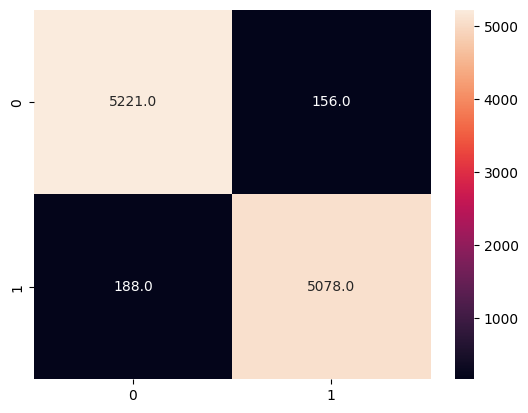

In [ ]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

##2. Decision Tree

In [ ]:
tree_classify=DecisionTreeClassifier()
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_classify.predict(x_test)

In [ ]:
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5377
           1       0.96      0.96      0.96      5266

    accuracy                           0.96     10643
   macro avg       0.96      0.96      0.96     10643
weighted avg       0.96      0.96      0.96     10643



###Cross Validation

In [ ]:
parameters = {"criterion":["gini","entropy"],"max_depth":[4,5],"min_samples_split":[1,2],"min_samples_leaf":[1,2]}

In [ ]:
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring='roc_auc', cv=5 , refit='accuracy')
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2]},
             refit='accuracy', scoring='roc_auc')

In [ ]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
tree_cv.best_score_

0.9975194313077719

##3.Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5377
           1       0.96      0.96      0.96      5266

    accuracy                           0.96     10643
   macro avg       0.96      0.96      0.96     10643
weighted avg       0.96      0.96      0.96     10643



###Cross Validation

In [ ]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [ ]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   1.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   1.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   1.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   1.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2]},
             verbose=2)

In [ ]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

##4. K Nearest Neighbors

In [ ]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = k_neighbor.predict(x_test)

In [ ]:
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
test_accuracy = k_neighbor.score(x_test, y_test)
print(test_accuracy)

0.9770735947006178
0.9651414074978859


In [ ]:
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

array([[5183,  194],
       [ 177, 5089]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.965154276054888

##5.Support Vector Machine

In [ ]:
support_vector = SVC(kernel='rbf')
support_vector.fit(x_train, y_train)

SVC()

In [ ]:
support_vector.score(x_test, y_test)

0.9674903692567886

In [ ]:
y_pred = support_vector.predict(x_test)

In [ ]:
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5225,  152],
       [ 194, 5072]])

##6. Naive Bayes Classifier

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [ ]:
naive_bayes.score(x_train,y_train)

0.9609358483474666

In [ ]:
y_pred = naive_bayes.predict(x_test)

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.75307713990416


##Model evaluation

In [ ]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf = 1,min_samples_split = 2)
rf_model=RandomForestClassifier(criterion = 'gini',max_depth = 4,min_samples_leaf = 2,min_samples_split = 2)
knn_model = KNeighborsClassifier()
svc_model=SVC(kernel='linear')
nb_model=GaussianNB()


#Create a list of models
models=[lr_model,svc_model,dt_model,rf_model,knn_model,nb_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)

        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        f1_train = f1_score(y_train,y_pred_train)
        f1_test = f1_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)

        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,"F1_Train"]=round(f1_train*100,2)
        df.loc[i,"F1_Test"]=round(f1_test*100,2)
        df.loc[i,'MOdel_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test


In [ ]:
final_result_df,dct_train,dct_test=score_model(x_train,y_train,x_test,y_test)

In [ ]:
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,F1_Train,F1_Test,MOdel_training_time
0,LogisticRegression,97.03,96.77,97.34,97.02,96.63,96.43,97.03,96.76,96.98,96.72,0.547926
1,SVC,97.01,96.75,97.44,97.09,96.49,96.32,97.01,96.74,96.96,96.70,12.698759
2,DecisionTreeClassifier,97.12,96.70,97.27,96.94,96.89,96.37,97.11,96.70,97.08,96.66,0.045335
3,RandomForestClassifier,97.07,96.70,97.46,97.07,96.59,96.24,97.07,96.70,97.02,96.65,2.910217
4,KNeighborsClassifier,97.71,96.51,97.60,96.33,97.76,96.64,97.71,96.52,97.68,96.48,0.216706
5,GaussianNB,96.09,95.75,96.23,95.80,95.84,95.61,96.09,95.75,96.04,95.70,0.014497


From the above table it is evident that F1 score is more in SVC Model.
Also as per ROC_AUC the best model is SVC and last model is Naive Bayes.
So i find the best model from the above data is SVC.

#Model Explainability

In [ ]:
!pip install eli5
import eli5 as eli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=53a40080846bb0ba93cf55152a7fe096d5d2ffc1d51bd0c3b62cb49dae206889
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
eli.explain_weights(lr_model)

Weight?,Feature
+2.283,x0
+0.286,x2
+0.266,x1
+0.252,x12
+0.214,x5
+0.213,x9
+0.149,x3
+0.056,x4
+0.044,x10
-0.011,x6


In [ ]:
import re

# creating a function to find the features based on the ELI5 index values
def get_feature_name_from_eli5_index(eli5_index, feature_names):
    # Extract the feature index from the ELI5 feature name
    match = re.match(r"X(\d+)", eli5_index)
    if not match:
        raise ValueError(f"Invalid ELI5 feature name: {eli5_index}")
    feature_index = int(match.group(1))

    # Get the corresponding feature name
    if feature_index >= len(feature_names) or feature_index < 0:
        raise ValueError(f"ELI5 feature index {feature_index+1} out of range for feature names list")
    feature_name = feature_names[feature_index]

    return feature_name


In [ ]:
feature_names = x_train.columns
eli5_feature_name = ["X0","X2","X1","X12","X5","X9","X3","X8","X14"]
for name in eli5_feature_name :
  feature_name = get_feature_name_from_eli5_index(name, feature_names)
  print(f"ELI5 feature '{name}' corresponds to feature '{feature_name}'")

ELI5 feature 'X0' corresponds to feature 'overall'
ELI5 feature 'X2' corresponds to feature 'cabin_service'
ELI5 feature 'X1' corresponds to feature 'seat_comfort'
ELI5 feature 'X12' corresponds to feature 'cabin_Economy Class'
ELI5 feature 'X5' corresponds to feature 'ground_service'
ELI5 feature 'X9' corresponds to feature 'trvlr_typ_Family Leisure'
ELI5 feature 'X3' corresponds to feature 'food_bev'
ELI5 feature 'X8' corresponds to feature 'trvlr_typ_Couple Leisure'
ELI5 feature 'X14' corresponds to feature 'cabin_Premium Economy'


#Conclusion

1. From the EDA, we have discovered that A320 is the most commonly used aircraft type and Spirit Airlines is the most flown aircraft by passengers.77% of passengers chose to fly in economy class as it is the most cheapest.
2. 6 different models fitted by the data and able to generate 95% accuracy in all the models.
3. So overall rating got identified as the highest weightage. So recommendation will be yes if there is more overall rating.
4. Cabin Service has second highest weightage. So cabin service has to be improved in order to impress travellers.
5. Economic class travellers are more prone to recommend their friends and family.
6. Seat comfort,Ground service and food are carrying approx equal weights towards recommendation.
7. The results can be utilized and improve the required keythings to increase customer satisfaction which ultimately leads to revenue generation.

# **Thank You!** 🙏